# **Waze Project**
**Course 6 - The nuts and bolts of machine learning**

# **Course 6 End-of-Course Project: Build a machine learning model**

**Part 1:** Model Building and Evaluation

**Part 2:** Interpreting Model Results

# **Build a machine learning model**


### **Imports and data loading**

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
import pickle

In [3]:
df = pd.read_csv('dataset_encoded_features.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,drives_per_driving_day,km_per_drive,sessions_per_activity_day,is_churned,device_code
0,0,0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,138.360267,11.894737,11.632058,10.107143,0,2
1,1,1,1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1246.901868,9.727273,128.186173,10.230769,0,1
2,2,2,2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,382.393602,11.875000,32.201567,8.142857,0,2
3,3,3,3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,304.530374,13.333333,22.839778,7.000000,0,1
4,4,4,4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,219.455667,3.777778,58.091206,3.111111,0,2


### **Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

In [5]:
df.drop(columns=["ID", "Unnamed: 0.1", "Unnamed: 0"], inplace=True)
df.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,drives_per_driving_day,km_per_drive,sessions_per_activity_day,is_churned,device_code
0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,138.360267,11.894737,11.632058,10.107143,0,2
1,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1246.901868,9.727273,128.186173,10.230769,0,1
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,382.393602,11.875000,32.201567,8.142857,0,2
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,304.530374,13.333333,22.839778,7.000000,0,1
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,219.455667,3.777778,58.091206,3.111111,0,2


### **Modeling workflow and model selection process**

### **Split the data**

In [6]:
X = df.copy().drop(columns=["is_churned"])
y = df["is_churned"]
X_, X_test, y_, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_, y_, stratify=y_,
                                                  test_size=0.25, random_state=42)

In [7]:
print(y_train.shape, y_test.shape, y_val.shape)

(6531,) (2177,) (2177,)


### **Modeling**

In [8]:
rf = RandomForestClassifier(random_state=2)
cv_params = {
    'max_depth': [3, 5, 10, 15, None],
    'max_features': [1.0],
    'max_samples': [1.0],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2],
    'n_estimators': [100, 150, 300],
}

scoring = ["accuracy", "f1", "precision", "recall"]
rf_cv = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=5, refit="recall")

In [9]:
%%time
rf_cv.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

CPU times: user 10min 2s, sys: 2.47 s, total: 10min 5s
Wall time: 10min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 10, 15, None],
                         'max_features': [1.0], 'max_samples': [1.0],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [100, 150, 300]},
             refit='recall', scoring=['accuracy', 'f1', 'precision', 'recall'])

In [10]:
rf_cv.best_score_

0.09799662912740366

Examine the best combination of hyperparameters.

In [11]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [12]:
def make_results(model_name, model_object, metric):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [13]:
results = make_results('Random Forest: train', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,Random Forest: train,0.482791,0.097997,0.162712,0.823611


The results aren't particularly good. Most of the metrics, aside from accuracy, are pretty low

#### **XGBoost**

In [14]:
xgb = XGBClassifier(objective='binary:logistic', random_state=912)
cv_params = {
    'max_depth': [3, 5, 6, 12],
    'min_child_weight': [3, 5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 150, 200, 300]
}
scoring = ["accuracy", "f1", "precision", "recall"]
xgb_cv = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring=scoring, cv=5, refit="recall")

In [15]:
%%time
xgb_cv.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

CPU times: user 6min 5s, sys: 2min 1s, total: 8min 7s
Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=912, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [3, 5, 6, 12], 'min_child_weight': [3, 5],
                         'n_estimators': [100, 150, 200, 300]},
             refit='recall', scoring=['accuracy', 'f1', 'precision', 'recall'])

In [16]:
xgb_cv.best_score_

0.132126714165326

In [17]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [18]:
xgb_cv_results = make_results('XGB: train', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest: train,0.482791,0.097997,0.162712,0.823611
0,XGB: train,0.357803,0.132127,0.192709,0.806614


This model fit the data better than the random forest model. The recall score is 4% larger than the random forest model, so is F1, precision is 13% lower, while accuracy remains similar

### **Model selection**

#### **Random forest**

In [19]:
rf_val_prdictions = rf_cv.predict(X_val)

In [20]:
def get_test_scores(model_name, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [21]:
rf_val_df = get_test_scores("RF cv: validation", rf_val_prdictions, y_val)
results = pd.concat([results, rf_val_df], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest: train,0.482791,0.097997,0.162712,0.823611
0,XGB: train,0.357803,0.132127,0.192709,0.806614
0,RF cv: validation,0.486111,0.091864,0.154525,0.824070


#### **XGBoost**

In [22]:
xgb_val_predictions = xgb_cv.predict(X_val)

xgb_val_df = get_test_scores("XGB cv: validation", xgb_val_predictions, y_val)
results = pd.concat([results, xgb_val_df], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest: train,0.482791,0.097997,0.162712,0.823611
0,XGB: train,0.357803,0.132127,0.192709,0.806614
0,RF cv: validation,0.486111,0.091864,0.154525,0.824070
0,XGB cv: validation,0.333333,0.112861,0.168627,0.805237


The XGBoost model's validation scores are fairly similar, but since we prioritize the cost of a false negative, let's choose this model as its recall is slightly higher

### **Use champion model to predict on test data**


In [27]:
xgb_test_predictions = xgb_cv.predict(X_test)
xgb_test_df = get_test_scores("XGB cv: test", xgb_test_predictions, y_test)
results = pd.concat([results, xgb_test_df], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest: train,0.482791,0.097997,0.162712,0.823611
0,XGB: train,0.357803,0.132127,0.192709,0.806614
0,RF cv: validation,0.486111,0.091864,0.154525,0.824070
0,XGB cv: validation,0.333333,0.112861,0.168627,0.805237
0,XGB cv: test,0.401709,0.123360,0.188755,0.814424
0,XGB cv: test,0.401709,0.123360,0.188755,0.814424


### **Confusion matrix**

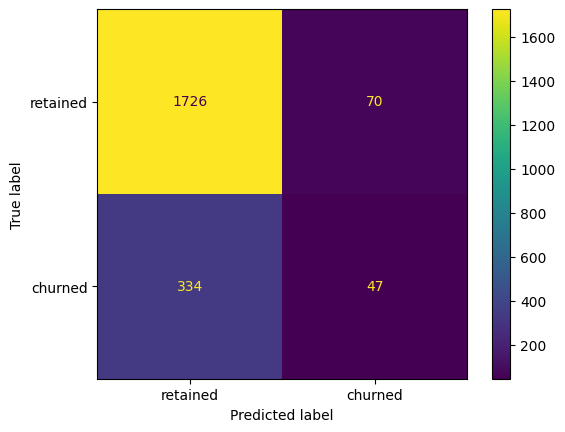

In [24]:
cm = confusion_matrix(y_test, xgb_test_predictions, labels=xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot()
disp.figure_.savefig('xgboost_cm.png', transparent=True)

In [25]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, xgb_test_predictions, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.84      0.96      0.90      1796
     churned       0.40      0.12      0.19       381

    accuracy                           0.81      2177
   macro avg       0.62      0.54      0.54      2177
weighted avg       0.76      0.81      0.77      2177



The model predicted almost 5 times as many false negatives than it did false positives, and it correctly identified only 12% of the users who actually churned.

### **Feature importance**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

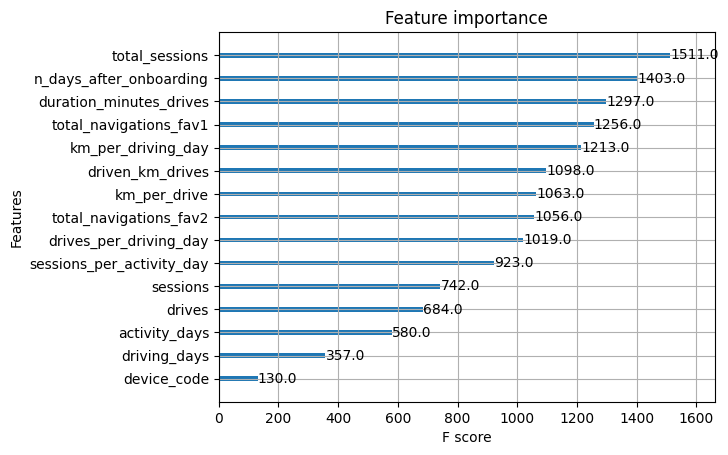

In [26]:
plot_importance(xgb_cv.best_estimator_)

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

NB: we should not forget that total_sessions is a model estimation that didn't prove to be a reliable value in pt 1

### **Conclusion**

Both models demonstrated low performance and should not be chosen for production. Still, it could be used to guide further exploratory efforts.
The features chosen by the XGBoost model are very different from the features chosen by the logistic regression model. Here, the number of days after onboarding, the duration of drives, and the number of navigations to a favourite place are the top-3 most important. The engineered features appear in the middle of the graph, being slightly less important according to the model.

Even though tree-based models are not sensitive to outliers, points made in the previous parts still stand, and answers & data are needed to imporove model predictions. As a reminder, the points are:
* since there were a lot of errors in the data, there is concern about the overall correctness of this data
* no clear definition on how "churned" is assigned
* the need for more granular data